In [12]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Conv2D, MaxPooling2D # new!
from keras.layers import Flatten # new!

In [13]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

In [14]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_valid = X_valid.reshape(10000, 28, 28, 1).astype('float32')
# como eh monocromatico a data, 1 é a 4° dimensao.
# se fosse full color images, seria 3

In [15]:
X_train /= 255
X_valid /= 255

n_classes = 10
y_train = keras.utils.to_categorical(y_train, n_classes)
y_valid = keras.utils.to_categorical(y_valid, n_classes)

### Designing the Neural Network Architecture

In [16]:
model = Sequential()
# first convolutional layer:
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', #32 filtros
                 input_shape=(28, 28, 1))) # default stride len 1
# padding ta deafault tbm, alternativa: padding='same'

# second conv layer, with pooling and dropout:
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #64 filtros
# stride ta None (default), então ta igual ao pool size
model.add(Dropout(0.25)) # para reduzir risco de overfitting
model.add(Flatten()) # converte o activation map de 3D para 1D

# dense (fully connected) hidden layer, with dropout:
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# output layer:
model.add(Dense(n_classes, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1. The first convolutional layer learns to represent simple features like straight lines at a particular orientation

2. The second convolutional layer recombines those simple features into more-abstract representations.

3. The third, dense layer, allows spatial features identified by 2° conv layer to be recombined in any way that’s optimal for
distinguishing classes of images (there is no sense of spatial orientation within a dense layer).

In [17]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

**OUTPUT SHAPE**:

1. Conv layer takes 28x28 digits -> outputs 26x26 activation map -> act map has depth of 32 slides (as there's 32 kernels

2. 2° conv laret receives input -> hyperparams unchange, activation map shrinks again, down to 24x24 -> map is twice as deep, w/ 64 kernels.

3. Max-pooling layer has a kernel size of 2 & stride of 2 -> reduces data vol by half -> yields activation map of 12x12 -> depth not affected, retains 64 slices

4. Flatten layer collapses 3D act map down to 1D array w/ 9216 elements

5. Dense layer contains 128 neurons, outputs 1D array of 128 activation values

6. Softmax output has 10 neurons -> outputs 10 probabilities (one yhat to each possible digit)

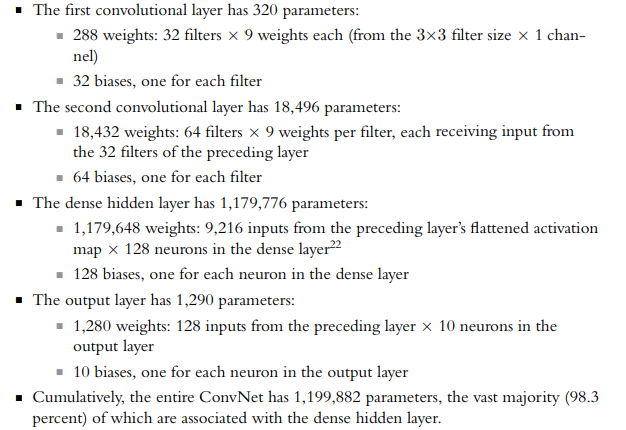

In [18]:
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

In [19]:
model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 155s 328ms/step - accuracy: 0.6879 - loss: 1.0636 - val_accuracy: 0.9439 - val_loss: 0.1865
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 149s 317ms/step - accuracy: 0.9244 - loss: 0.2568 - val_accuracy: 0.9662 - val_loss: 0.1060
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 153s 327ms/step - accuracy: 0.9517 - loss: 0.1631 - val_accuracy: 0.9765 - val_loss: 0.0758
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 198s 318ms/step - accuracy: 0.9647 - loss: 0.1258 - val_accuracy: 0.9814 - val_loss: 0.0575
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 148s 316ms/step - accuracy: 0.9691 - loss: 0.1059 - val_accuracy: 0.9829 - val_loss: 0.0513
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 207s 326ms/step - accuracy: 0.9727 - loss: 0.0935 - val_accuracy: 0.9855 - val_loss: 0.0471
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 197s 315ms/step - accuracy: 0.9751 - loss: 0.0806 - val_accuracy: 0.9852 - val_loss: 0.0431
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 149s 318ms/step - accuracy: 0.9789 -